# Use this code to take a closer looks at the raw video data.  

1-You can find sections where outside lights contaminate the tracking.

2-You can verify the mask.

3-This is also a good way to understand part of the processing pipeline for position data.

In [1]:
import VideoUtils as vu
import numpy as np
from matplotlib import pyplot as plt

import array

from scipy import ndimage

In [ ]:
timestamps, xpt, ypt, dwP, dnT = vu.getVideoData('./RawData/VT1.Nvt')

In [45]:
print(dwP[0])

(15565055, 15532291, 15696124, 15663366, 15827196, 15794441, 15958270, 15925515, 16089341, 16056578, 16220416, 16187652, 16482570, 16449805, 16613637, 16580878, 16744707, 16711947)


In [ ]:
xloc, yloc, ts = vu.getTrackerXY_Points('./RawData/VT1.Nvt')

In [36]:
#print(ts[79000:79200]//100)
maze_ts = ts[79000:]//100
print(maze_ts[0])
x_loc_pix = np.round(xloc/(np.max(xloc)/640))
y_loc_pix = np.round(yloc/(np.max(yloc)/480))

maze_xloc = x_loc_pix[79000:]
maze_yloc = y_loc_pix[79000:]

25466811.0


In [ ]:
pvdts, pvdx, pvdy = vu.readPVDfile('./RawData/maze_dwPout.pvd')

(250, 480)

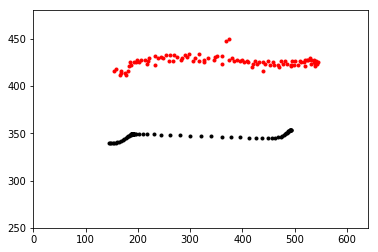

In [43]:
plt.plot(pvdx[500:600], pvdy[500:600], 'k.')
plt.xlim(0,640)
plt.ylim(250,480)

plt.plot(maze_xloc[500:600], maze_yloc[500:600], 'r.')
plt.xlim(0,640)
plt.ylim(250,480)


In [6]:
print(ts[0], timestamps[0], xloc[0], xpt[0], dwP[0])

(1228737548.0, 1228737548, 67047.0, 231, (15565055, 15532291, 15696124, 15663366, 15827196, 15794441, 15958270, 15925515, 16089341, 16056578, 16220416, 16187652, 16482570, 16449805, 16613637, 16580878, 16744707, 16711947))


In [ ]:
plt.plot(xloc, yloc,'r.')
plt.show()

mstart = 78000
mstop = 220000

In [ ]:
print(len(ts))
print(len(xloc))
x_loc_pix = np.round(xloc/(np.max(xloc)/640))
y_loc_pix = np.round(yloc/(np.max(yloc)/480))
plt.plot(x_loc_pix, y_loc_pix, 'c.')
plt.show()
print(np.max(x_loc_pix))

In [ ]:
print(mstart)
starts = np.arange(mstart,mstop, len(ts)//100)

print(starts)

In [ ]:
x = plt.hist(x_loc_pix[mstart:mstop])
print(x)

plt.show()


In [ ]:
for start in starts[:-2]:
    stop = len(ts)//100
    plt.plot(x_loc_pix[start:start+stop], y_loc_pix[start:start+stop], 'r,')
    plt.show()
    
    

In [ ]:
plt.hist(xpt)
plt.show()

In [ ]:
##in set the ylims and xlims for the track (can help eliminate
# contimination.  Make sure you don't cut the good data out.
print(np.shape(dnT))
xlim = [0, 640]
ylim = [250, 480]

In [ ]:
##accumulate the binary pixels for each frame in a segment

def returnVideoSeg(segment):
  accumulate = np.zeros([640,480])
  for ii,targets in enumerate(segment):
    for t in targets:
        line = format(t, '032b')
        print("line: ", line)
        pure = line[0:4]
        y = int(line[4:16], 2)
        raw = line[16:20]
        x = int(line[20:], 2)
        if (ylim[0] < y < ylim[1] and xlim[0] < x < xlim[1]):
           accumulate[x,y] += 1
  return accumulate      

In [ ]:
##use this setion to plot a series segments to help 
# identify problematic segments.  mstart and mstop
# are the start and stop of the maze epochs.

mstart = 780000
mstop = 220000

starts = np.arange(mstart,mstop, len(dwP)//100)
for start in starts[:-2]:
    segment = dwP[start:start+c]
    accum = returnVideoSeg(segment)
    mask = np.zeros_like(accum)
    
    mask[np.where(accum>1)] = 1
    plt.subplot(1,2,1)
    plt.imshow(mask)
    plt.subplot(1,2,2)
    plt.imshow(accum)
    plt.title(str(start))
    plt.show()
    

In [ ]:

segment = dwP[78000:220000]
accum = returnVideoSeg(segment)
mask = np.zeros_like(accum)
    
mask[np.where(accum>1)] = 1
plt.imshow(mask)
plt.show()

In [ ]:
mask = ndimage.binary_dilation(mask, structure=np.ones((10,10)))
  #erode and dilate mask to find outline of maze

plt.imshow(mask)
plt.show()
mask = ndimage.binary_erosion(mask, structure=np.ones((10,10)))

#mask = ndimage.binary_dilation(mask, structure=np.ones((10,50)))

plt.imshow(mask)
plt.show()

In [ ]:
plt.plot(xpt, ypt, 'r.')
plt.show()

In [ ]:
print(np)